What is Pandas ?
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [1]:
import pandas as pd
print(pd.__version__)

1.4.4


1. Read data (Đọc dữ liệu từ file, hiểu cấu trúc của dataframe)
2. Exact data (Trích xuất dữ liệu, trích chọn dữ liệu)
3. Draw graph (Vẽ đồ thị dữ liệu)
4. Transform data type (Chuyển đổi dữ liệu, xử lý dữ liệu)

In [1]:
import pandas as pd
# 1. Đọc dữ liệu từ file  
df = pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
#2. check data is null
print(df.shape)
df.isna().sum()

(11162, 17)


age          12
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [3]:
# delete na rows
print(df.shape)
df.isna().sum()

df = df.dropna()
print(df.isna().sum())
print(df.shape)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
(11150, 17)


In [4]:
# tên cột
names = df.columns.values.tolist()
print(len(names))
print(names)
types = df.dtypes
print(types)


17
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']
age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object


In [5]:
#lấy thông tin theo cột

# lấy 1 ô 
# val = df['col_name'].values[0]
x = df['age'][2]
print(x)
# lấy cả cột
col = list(df['age'])
print(len(col))
print(col[:10])
# lấy nhiều cột theo khoảng
cols = df.loc[1:3,['age','job']]
print(cols)
# lấy nhiều cột theo điều kiện
cols = df.loc[df['age']>50,['age','job']]
print(cols)

41.0
11150
[59.0, 56.0, 41.0, 55.0, 54.0, 42.0, 56.0, 60.0, 37.0, 28.0]
    age         job
1  56.0      admin.
2  41.0  technician
3  55.0    services
        age         job
0      59.0      admin.
1      56.0      admin.
3      55.0    services
4      54.0      admin.
6      56.0  management
...     ...         ...
11140  55.0    services
11142  52.0      admin.
11144  60.0     retired
11145  60.0     retired
11154  52.0  technician

[2471 rows x 2 columns]


In [6]:
# lấy cả dòng 
# loc gets rows (or columns) with particular labels from the index.
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
row = list(df.iloc[0])
print(row)
rows = list(df.iloc[0:2])
print(rows)

[59.0, 'admin.', 'married', 'secondary', 'no', 2343, 'yes', 'no', 'unknown', 5, 'may', 1042, 1, -1, 0, 'unknown', 'yes']
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [7]:
# lấy toàn bộ dữ liệu
# chuyển về dạng numpy 
data = df.values
print(data.shape)
print(data[0])

(11150, 17)
[59.0 'admin.' 'married' 'secondary' 'no' 2343 'yes' 'no' 'unknown' 5
 'may' 1042 1 -1 0 'unknown' 'yes']


In [8]:
# lấy dữ liệu theo điều kiện 
d = df.loc[df['age']==53]
print(d.shape)
print(d.head().T)

(204, 17)
                  48           192           198        246         260
age              53.0         53.0          53.0       53.0        53.0
job        technician  blue-collar  entrepreneur  housemaid  technician
marital      divorced     divorced        single    married     married
education     primary      primary     secondary    primary   secondary
default            no           no            no         no          no
balance          1443         2656            62        104         480
housing           yes          yes           yes         no          no
loan               no           no            no        yes          no
contact       unknown      unknown       unknown    unknown     unknown
day                14           30            30          5           6
month             may          may           may        jun         jun
duration          476         1980          1044        701         648
campaign            1            2             5      

married     6347
single      3513
divorced    1290
Name: marital, dtype: int64


<AxesSubplot:>

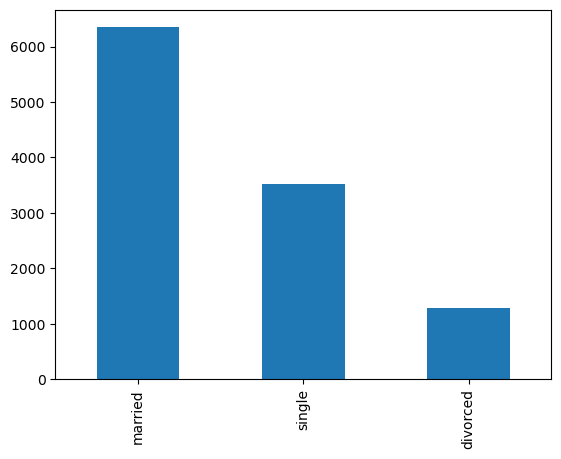

In [9]:
#3. vẽ
# - đếm frequency trước khi vẽ 
f = df['marital'].value_counts()
print(f)
f.plot.bar()

no     5873
yes    5277
Name: deposit, dtype: int64


<AxesSubplot:>

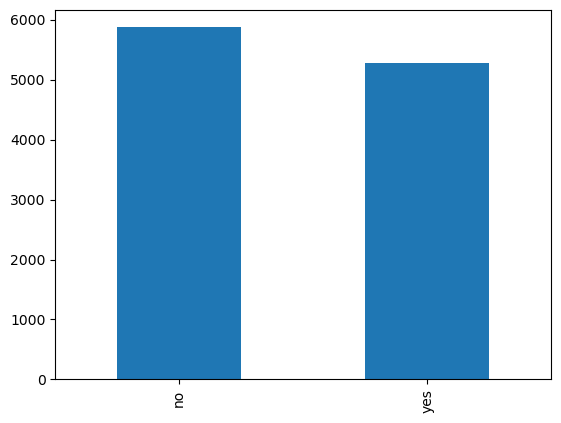

In [10]:
f = df['deposit'].value_counts()
print(f)
f.plot.bar()

secondary    5470
tertiary     3684
primary      1499
unknown       497
Name: education, dtype: int64


<AxesSubplot:>

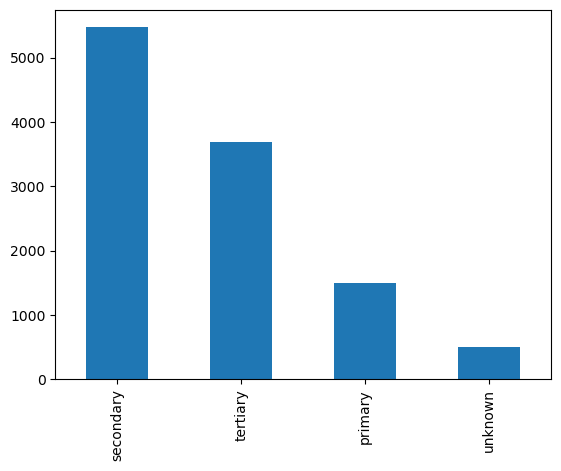

In [33]:
f = df['education'].value_counts()
print(f)
f.plot.bar()

<AxesSubplot:xlabel='education', ylabel='job'>

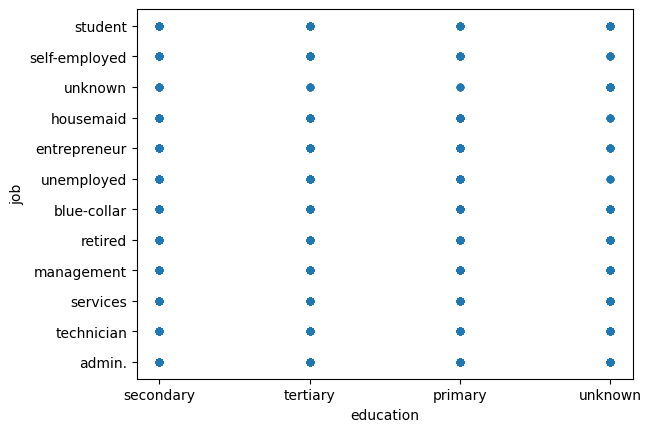

In [34]:
# quan hệ giữa các attribute
df.plot.scatter(x='education',y='job')

<AxesSubplot:xlabel='species'>

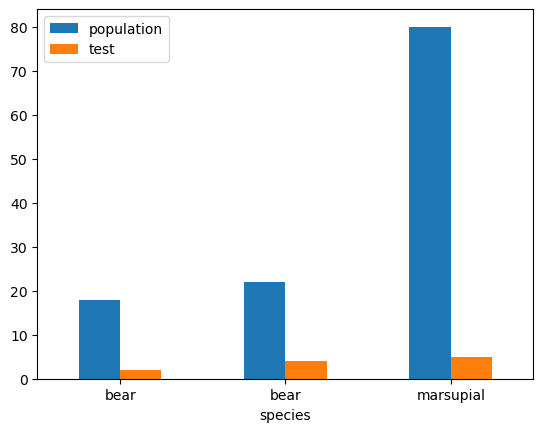

In [25]:
# 3. vẽ đồ thị 
# trục hoành là 1 cột, trục tung là các cột giá trị số còn lại  
df1 = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
                  'population': [18, 22, 80],
                    'abc': ['a', 'b', 'c'],
                   'test':[2,4,5]},
                  index=['panda', 'polar', 'koala'])
#print(df1)
df1.plot.bar(x='species', rot=0)

<AxesSubplot:xlabel='species'>

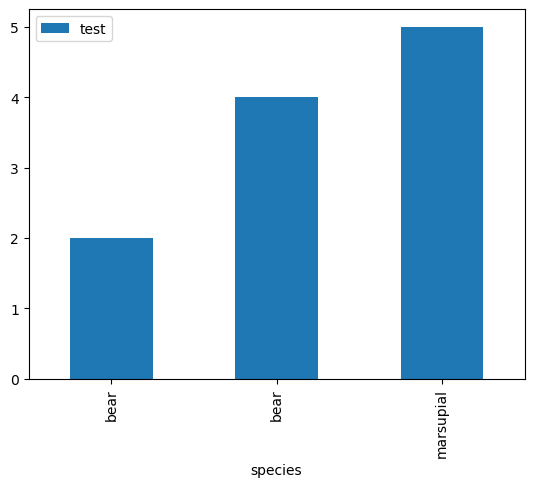

In [26]:
# 3. vẽ đồ thị 
# - xác định 2 trục trước khi vẽ, trong đó y là trục numeric 
df1 = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
                  'population': [18, 22, 80],
                    'abc': ['a', 'b', 'c'],
                   'test':[2,4,5]},
                  index=['panda', 'polar', 'koala'])
#print(df1)
df1.plot.bar(x='species',y='test')

<AxesSubplot:>

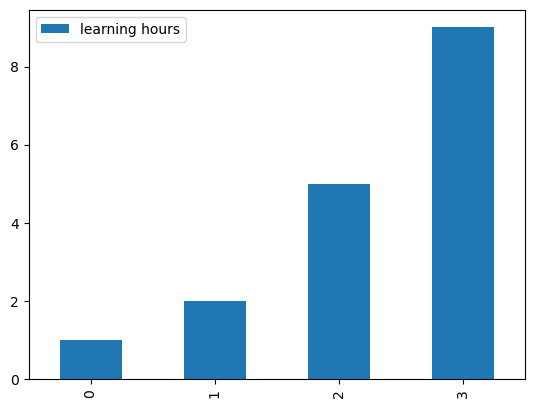

In [36]:
df3 = pd.DataFrame({'learning hours': [1, 2, 5, 9],
                  'ranking': ['d', 'c', 'b', 'a']})
df3.plot.bar()

<AxesSubplot:xlabel='ranking', ylabel='learning hours'>

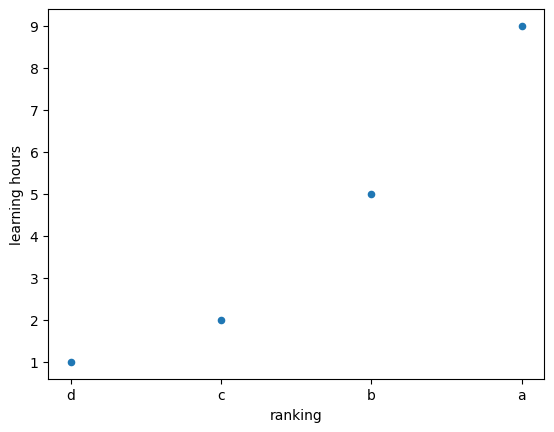

In [37]:
df3.plot.scatter(x='ranking',y='learning hours')

In [156]:
# 4. Chuyển đổi dữ liệu 
from sklearn.preprocessing import LabelEncoder

df3 = pd.DataFrame({'learning hours': [1, 8, 2, 3, 5, 9],
                  'ranking': ['d', 'a','c', 'b','b', 'a']})
LE = LabelEncoder()
df3['code'] = LE.fit_transform(df3['ranking'])
print(df3)
print(df3['code'])

   learning hours ranking  code
0               1       d     3
1               8       a     0
2               2       c     2
3               3       b     1
4               5       b     1
5               9       a     0


In [166]:
a = pd.factorize(df3['ranking']) 
print(a)
print(a[0])
print(list(a[0]))
df3['code1']=list(a[0])
print(df3)
# lấy danh sách indexing 
print(list(a[1]))

(array([0, 1, 2, 3, 3, 1]), Index(['d', 'a', 'c', 'b'], dtype='object'))
[0 1 2 3 3 1]
[0, 1, 2, 3, 3, 1]
   learning hours ranking  code  code1
0               1       d     3      0
1               8       a     0      1
2               2       c     2      2
3               3       b     1      3
4               5       b     1      3
5               9       a     0      1
['d', 'a', 'c', 'b']


In [169]:
# pandas dummies 
a = pd.get_dummies(df3['ranking'])
print(a)
frames = [df3,a]
result = pd.concat(frames,axis=1)
print(result)

   a  b  c  d
0  0  0  0  1
1  1  0  0  0
2  0  0  1  0
3  0  1  0  0
4  0  1  0  0
5  1  0  0  0
   learning hours ranking  code  code1  a  b  c  d
0               1       d     3      0  0  0  0  1
1               8       a     0      1  1  0  0  0
2               2       c     2      2  0  0  1  0
3               3       b     1      3  0  1  0  0
4               5       b     1      3  0  1  0  0
5               9       a     0      1  1  0  0  0
